In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [9]:
def denoise_image(image):
    return cv2.fastNlMeansDenoising(image, None, 10, 7, 21)

In [10]:
def sharpen_image(image):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(image, -1, kernel)

In [11]:
def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_float = np.array(gray, dtype=float)
    # Sobel
    sobelx = cv2.Sobel(gray_float, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray_float, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    
    # Prewitt
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewittx = cv2.filter2D(gray_float, -1, kernelx)
    prewitty = cv2.filter2D(gray_float, -1, kernely)
    prewitt = cv2.magnitude(prewittx, prewitty)
    
    # Canny
    canny = cv2.Canny(gray, 100, 200)
    return sobel , prewitt, canny

In [12]:
def display_images(image):
    # Denoise the image
    denoised_image = denoise_image(image)
    
    # Sharpen the image
    sharpened_image = sharpen_image(image)
    
    # Edge detection
    sobel, prewitt, canny = edge_detection(image)
    
    # Plotting the images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    plt.title('Denoised Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
    plt.title('Sharpened Image')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.imshow(prewitt, cmap='gray')
    plt.title('Prewitt Edge Detection')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')
    
    plt.show()

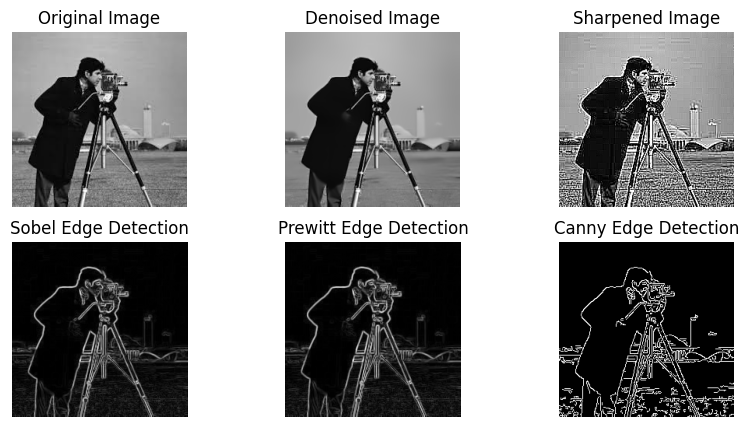

In [13]:
image = cv2.imread('cameraman.jpeg')

display_images(image)